In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from keras.models import load_model 
import streamlit as st
from datetime import date, timedelta
from sklearn.preprocessing import MinMaxScaler

today = date.today()
end_date = today.strftime("%Y-%m-%d")
d1 = date.today() - timedelta(days=360*10) 
start_date = d1.strftime("%Y-%m-%d")

st.title('Stock Price Prediction')

user_input = st.text_input('Enter Stock Ticker','GOOGL')

df = yf.download(tickers = user_input,start = start_date,end = end_date)
df= pd.DataFrame(df)
df = df.reset_index()
# Descibing the data
st.subheader('Past 10 year Data')
st.write(df.describe())

# Visualizng 
st.subheader('Closing Price vs Time Chart')
movin_avg_100 = df.Close.rolling(100).mean()
movin_avg_200 = df.Close.rolling(200).mean()

fig = plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close,label = 'Stock Data')
plt.plot(df.Date,movin_avg_100,'r',label='100 Days Moving Average')
plt.plot(df.Date,movin_avg_200,'g',label='200 Days Moving Average')
plt.legend()
plt.xlabel ('Time')
plt.ylabel ('Price')
plt.title ('GOOGLE Stock Price')
st.pyplot(fig)

input_data = []
scaler = MinMaxScaler(feature_range=(0,1))

[*********************100%***********************]  1 of 1 completed


In [49]:
df.shape

(2480, 7)

In [50]:
data=pd.DataFrame(df['Close'])
data = scaler.fit_transform(data)

In [51]:
data

array([[0.00688046],
       [0.00856313],
       [0.00794647],
       ...,
       [0.79036466],
       [0.79697199],
       [0.80435664]])

In [52]:
input_data = []
for i in range(100,data.shape[0]):
    input_data.append(data[i-100:i])
input_data=np.array(input_data)

In [53]:
input_data.shape

(2380, 100, 1)

In [54]:
df.Date.shape

(2480,)

75/75 [==============================] - 2s 17ms/step


2023-06-05 22:56:00.350 No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


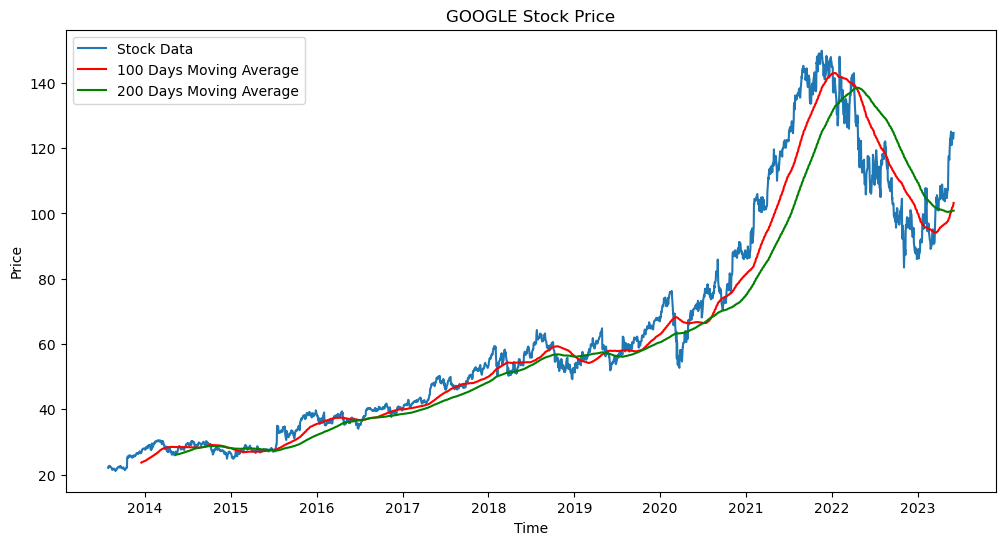

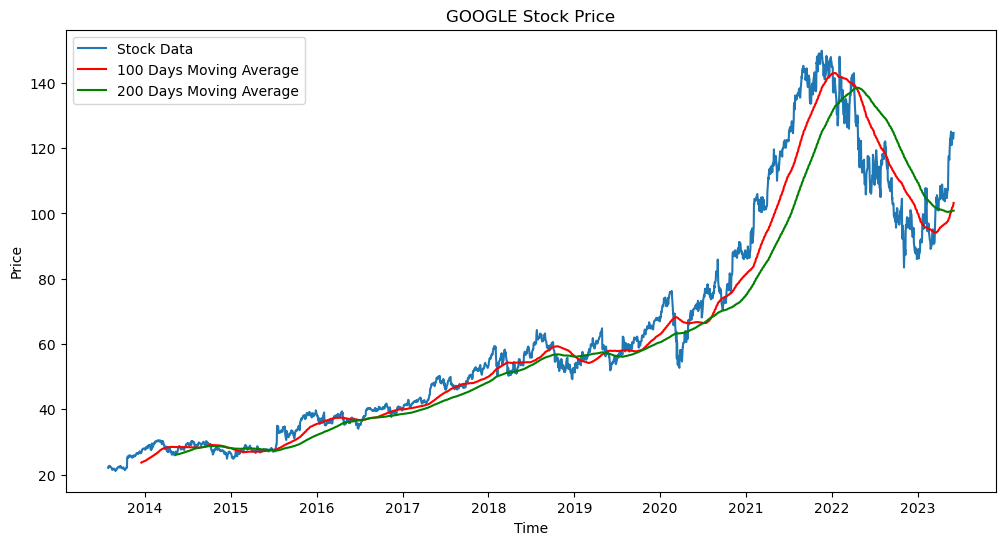

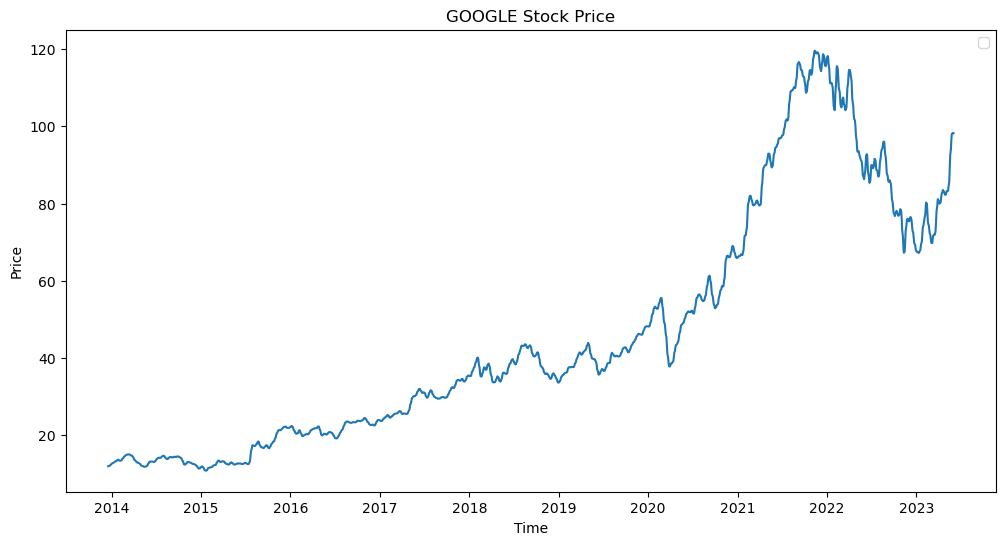

In [55]:
model = load_model('keras_model.h5')
st.text((df.shape,type(df)))

predicted_data = model.predict(input_data)
scale_factor = 1/scaler.scale_[0]
y_predicted = predicted_data*scale_factor

fig = plt.figure(figsize=(12,6))
plt.plot(df.Date[100:],pd.DataFrame(y_predicted)[0])
plt.legend()
plt.xlabel ('Time')
plt.ylabel ('Price')
plt.title ('GOOGLE Stock Price')
plt.show()

In [56]:
predicted_data.shape

(2380, 1)

In [57]:
scaler.scale_[0]

0.007773341318475745